In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

# 1. import data

In [204]:
dia = datasets.load_diabetes()  # 以字典型態載入

In [205]:
dia.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

## info

In [5]:
# info of the dataset: 

print(dia["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [15]:
dia["data"].shape

(442, 10)

In [206]:
# 用表格呈現前五筆

data = pd.DataFrame(dia["data"],columns = dia["feature_names"])
data["y"] = dia['target']
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# 2. Pearson correlation coefficient

In [207]:
# correlation matrix

data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [216]:
data.corr().style.background_gradient()

# https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


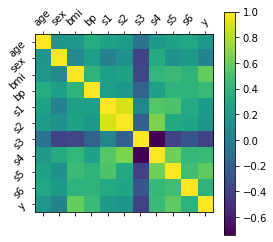

In [43]:
plt.matshow(data.corr())
plt.colorbar()  # 顯示

plt.xticks(range(data.shape[1]),data.columns,rotation = 45)
plt.yticks(range(data.shape[1]),data.columns,rotation = 45)
plt.show()

# 3. regression

In [ ]:
# package

import statsmodels.api as sm

## data preparation

In [111]:
# 把Ｘ跟y分開！

X = pd.DataFrame(dia["data"],columns = dia["feature_names"])
y = dia["target"]

In [112]:
# 此處，由於希望有截距項，所以多做一步添加一欄常數項的動作，可以看到，最左邊多出一欄const，方便我們以矩陣形式運算

X = sm.add_constant(X)
X.head()

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## model fitting

In [62]:
model1 = sm.OLS(y,X).fit()

## report

In [87]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.83e-62
Time:                        21:03:34   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# 單獨選取 其中的一表

model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,152.1335,2.576,59.061,0.000,147.071,157.196
age,-10.0122,59.749,-0.168,0.867,-127.448,107.424
sex,-239.8191,61.222,-3.917,0.000,-360.151,-119.488
bmi,519.8398,66.534,7.813,0.000,389.069,650.610
bp,324.3904,65.422,4.958,0.000,195.805,452.976
s1,-792.1842,416.684,-1.901,0.058,-1611.169,26.801
s2,476.7458,339.035,1.406,0.160,-189.621,1143.113
s3,101.0446,212.533,0.475,0.635,-316.685,518.774
s4,177.0642,161.476,1.097,0.273,-140.313,494.442
s5,751.2793,171.902,4.370,0.000,413.409,1089.150


* 有很多attributes可以獲取，自己試試看：

項目|code|return data type
--|--|--
參數估計值|model.params|pandas.Series
參數估計的Standard error|model.bse|pandas.Series
參數估計值的t value|model.tvalues|pandas.Series
參數估計的p value|model.pvalues|pandas.Series
...|...

[更多資訊](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

# 4. residual analysis

In [219]:
res = model1.resid

In [226]:
res.shape

(442,)

## 繪圖

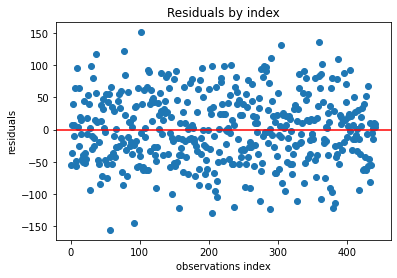

In [224]:
plt.scatter(range(res.shape[0]),res)

plt.title("Residuals by index")
plt.xlabel("observations index")
plt.ylabel("residuals")
plt.axhline(0,color = "red")
plt.show()

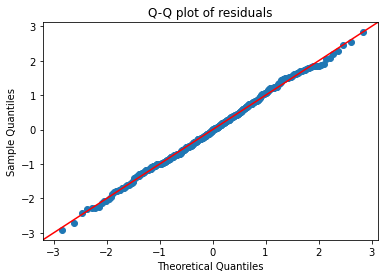

In [167]:
fig = sm.qqplot(res, fit=True, line="45")
plt.title("Q-Q plot of residuals")
plt.show()

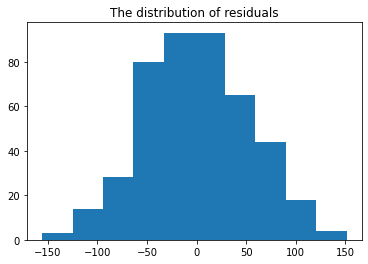

In [175]:
plt.title("The distribution of residuals")
plt.hist(res)
plt.show()

In [218]:
# 取得fitted values (return data type: pandas.Series)

fitted = model1.fittedvalues
fitted[:10] # 列出前10筆

0    206.117070
1     68.072348
2    176.884060
3    166.917966
4    128.459842
5    106.349090
6     73.894179
7    118.853787
8    158.810331
9    213.584089
dtype: float64

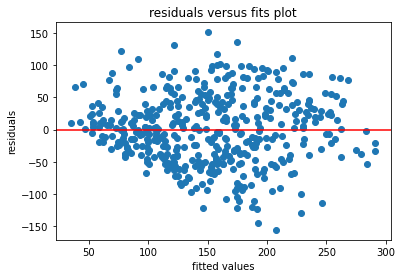

In [217]:
plt.title("residuals versus fits plot")
plt.scatter(fitted,res)
plt.axhline(0,color = "red")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

## 常態檢定

In [ ]:
import scipy.stats as st 

### Kolmogorov-Smirnov Test For Goodness-of-Fit
$H_{0}:$ the data was drawn from a population that follows a particular distribution<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html)

In [170]:
result = st.kstest(res, 'norm')  # norm指定了，這個檢定要比較的對象是常態分佈

# 結果
print("The test statistic為 %.3f，p value為 %.5f"%(result.statistic,result.pvalue)) # %.3f 四捨五入到小數後第3位

The test statistic為 0.487，p value為 0.00000


### Anderson-Darling Test For Goodness-of-Fit
$H_{0}:$ the data was drawn from a population that follows a particular distribution<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

In [225]:
result = st.anderson(res, 'norm')

print("The test statistic為 %.3f。\n 對應significance levels %s，critical values為 %s"%(result.statistic,result.significance_level,result.critical_values))

The test statistic為 0.366。
 對應significance levels [15.  10.   5.   2.5  1. ]，critical values為 [0.571 0.65  0.78  0.91  1.082]


### Shapiro-Wilk Test For Normality
$H_{0}:$ the data was drawn from a normal distribution<br>
[source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [173]:
result = st.shapiro(res)
print("The test statistic為 %.3f，p value為 %.5f"%(result.statistic,result.pvalue))

The test statistic為 0.997，p value為 0.61624


# 5. prediction
可以用pandas.DataFrame、numpy.array或是list的型態輸入<br>
（注意還是需要保留截距項）

In [139]:
# 假設希望預測一些新資料，名為X_new

X_new = pd.DataFrame({'const': (1.0, 1.0),
 'age': (0.02,-0.10),
 'sex': (-0.05, -0.04),
 'bmi': (0.0176, -0.0347),
 'bp': (-0.031, -0.0764),
 's1': (0.06, -0.063),
 's2': (0.044, -0.071),
 's3': (0.031,0.008),
 's4': (-0.002,-0.039),
 's5': (0.0371, -0.0006),
 's6': (-0.001,-0.08)})

In [141]:
X_new

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.0,0.02,-0.05,0.0176,-0.0310,0.060,0.044,0.031,-0.002,0.0371,-0.001
1,1.0,-0.10,-0.04,-0.0347,-0.0764,-0.063,-0.071,0.008,-0.039,-0.0006,-0.080


In [140]:
model1.predict(X_new)

0    167.046130
1    124.006301
dtype: float64

# 6. evaluation metrics

In [ ]:
y_true = [170,150]
y_pred = model1.predict(X_new)

## mean squared error
[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [196]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

342.19886582302416

## mean absolute error
[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [201]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_t幾rue, y_pred)

14.473784645590108

## mean absolute percentage error
[source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html)

In [202]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_true, y_pred)

0.0953335170819561